In [ ]:
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import utility.plots_cfg  # noqa: F401
from utility.save_plots import export_figs

In [ ]:
# Load the dataset
script_dir = os.path.dirname(__file__)
data_path = os.path.join(script_dir, "../data/clean/cleaned_listings.csv")
df = pd.read_csv(data_path)

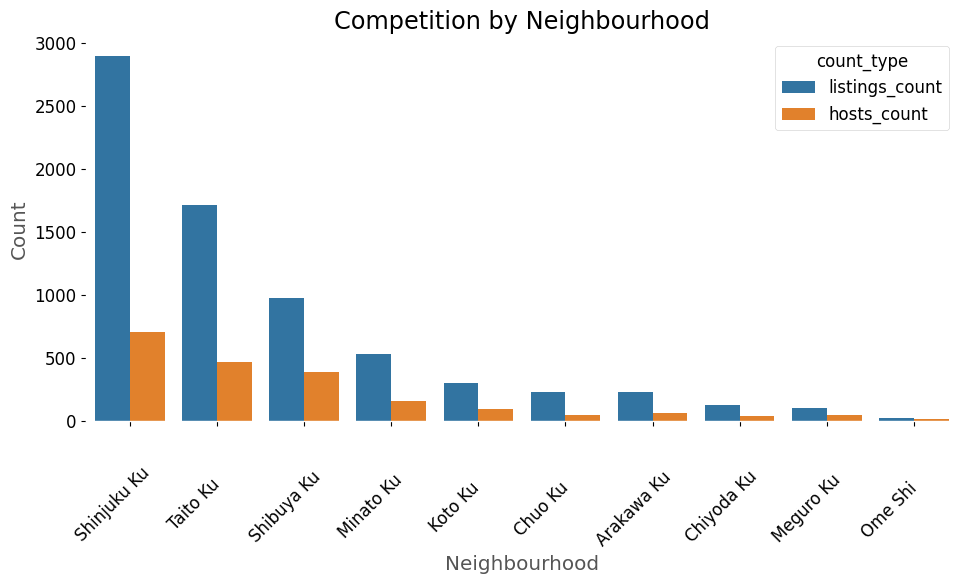

In [ ]:
# *1. Competition by Neighbourhood (Side-by-side chart)
# Calculate average price per neighbourhood
avg_price_per_neighbourhood = df.groupby("neighbourhood")["price"].mean().reset_index()
avg_price_per_neighbourhood = avg_price_per_neighbourhood.sort_values(
    by="price", ascending=False
)

# Select the 2nd to 11th average price per neighbourhood
top_neighbourhoods = avg_price_per_neighbourhood.sort_values(
    by="price", ascending=False
).iloc[1:11]

# Filter the original dataframe for these neighbourhoods
filtered_df = df[df["neighbourhood"].isin(top_neighbourhoods["neighbourhood"])]

# Count of "id" (listings) per neighbourhood
listings_count = (
    filtered_df.groupby("neighbourhood")["id"]
    .count()
    .reset_index(name="listings_count")
)

# Count of "host_id" per neighbourhood
hosts_count = (
    filtered_df.groupby("neighbourhood")["host_id"]
    .nunique()
    .reset_index(name="hosts_count")
)

# Merge the counts into one dataframe for plotting
merged_counts = pd.merge(listings_count, hosts_count, on="neighbourhood").sort_values(
    by="listings_count", ascending=False
)

# Melt the dataframe to prepare for a side-by-side barplot
melted_counts = merged_counts.melt(
    id_vars="neighbourhood",
    value_vars=["listings_count", "hosts_count"],
    var_name="count_type",
    value_name="count",
)
# Plot the data
fig1, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x="neighbourhood", y="count", hue="count_type", data=melted_counts, ax=ax)
ax.set_title("Competition by Neighbourhood")
ax.set_xlabel("Neighbourhood")
ax.set_ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

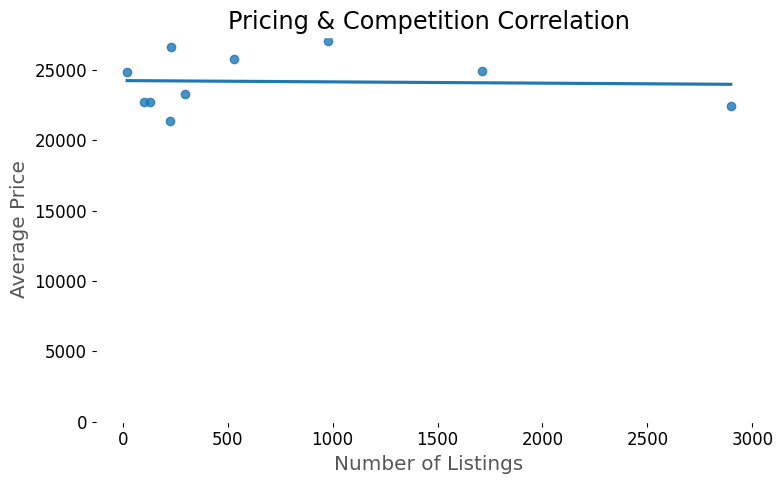

In [ ]:
# *2. Pricing & Competition Correlation (Scatter plot)
# Calculate the count of "id" and average price per "neighbourhood"
filtered_df2 = (
    filtered_df.groupby("neighbourhood")
    .agg(id_count=("id", "count"), average_price=("price", "mean"))
    .sort_values(by="average_price", ascending=True)
    .reset_index()
)

# Plot the data
fig2, ax = plt.subplots(figsize=(8, 5))
sns.regplot(x="id_count", y="average_price", data=filtered_df2, ci=None, ax=ax)
ax.set_title("Pricing & Competition Correlation")
ax.set_xlabel("Number of Listings")
ax.set_ylabel("Average Price")
ax.set_ylim(0, None)
plt.tight_layout()

plt.show()

<ipython-input-5-f4b65cfd0400>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


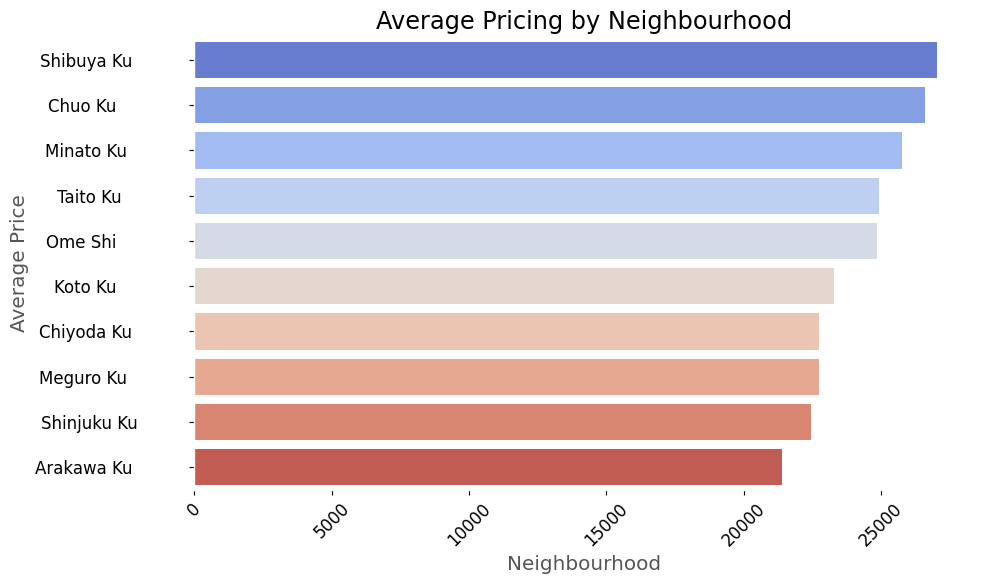

In [ ]:
# *3. AVG Pricing by Neighbourhood (Bar chart)
fig3, ax = plt.subplots(figsize=(10, 6))
sns.barplot(
    x="average_price",
    y="neighbourhood",
    data=filtered_df2.sort_values(by="average_price", ascending=False),
    palette="coolwarm",
    ax=ax,
    orient="h",
)
ax.set_title("Average Pricing by Neighbourhood")
ax.set_xlabel("Neighbourhood")
ax.set_ylabel("Average Price")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

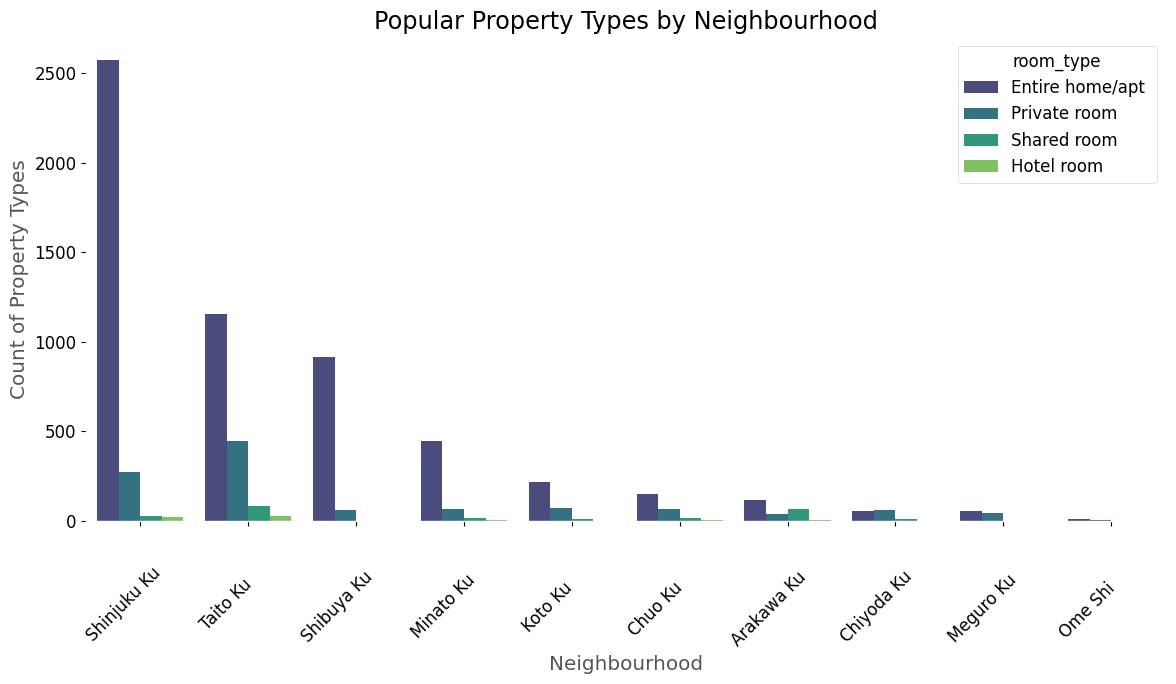

In [ ]:
# *4. Popular Property Types by Neighbourhood (Bar chart)
# Calculate the count of room types per neighbourhood
room_counts = (
    filtered_df.groupby(["neighbourhood", "room_type"]).size().reset_index(name="count")
)

# Determine the total count per neighbourhood
neighbourhood_order = (
    room_counts.groupby("neighbourhood")["count"]
    .sum()
    .sort_values(ascending=False)
    .index
)

# Plot the bar chart
fig4, ax = plt.subplots(figsize=(12, 7))
sns.countplot(
    x="neighbourhood",
    hue="room_type",
    data=filtered_df,
    palette="viridis",
    ax=ax,
    order=neighbourhood_order,  # Apply the sorted order
)
ax.set_title("Popular Property Types by Neighbourhood")
ax.set_xlabel("Neighbourhood")
ax.set_ylabel("Count of Property Types")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

<ipython-input-7-c8fb6de5729d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["listings_per_host"] = filtered_df.groupby("host_id")["id"].transform(


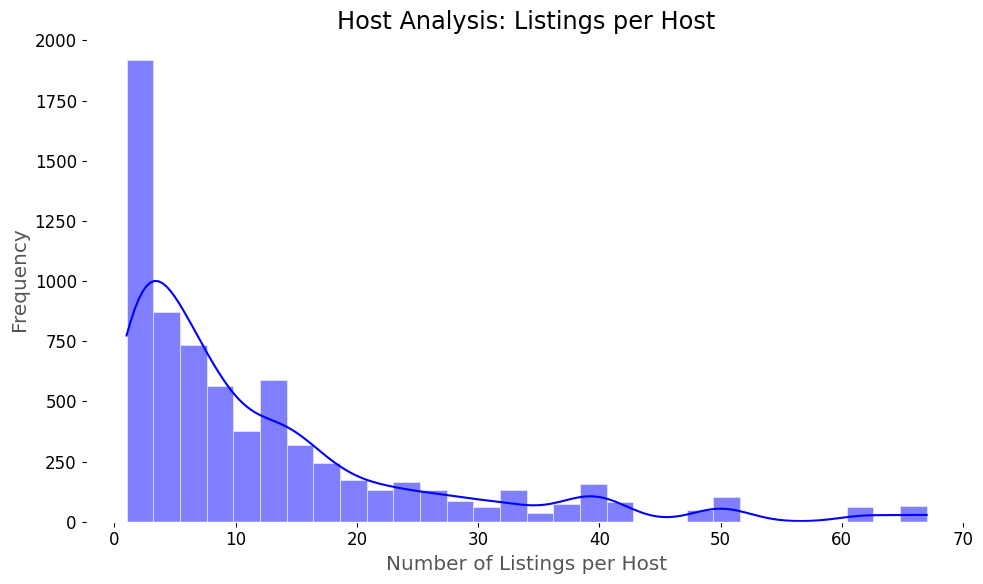

In [ ]:
# *5. Host Analysis Based on Listing Volume (Histogram)
filtered_df["listings_per_host"] = filtered_df.groupby("host_id")["id"].transform(
    "count"
)
fig5, ax = plt.subplots(figsize=(10, 6))
sns.histplot(filtered_df["listings_per_host"], bins=30, kde=True, color="Blue", ax=ax)
ax.set_title("Host Analysis: Listings per Host")
ax.set_xlabel("Number of Listings per Host")
ax.set_ylabel("Frequency")
plt.tight_layout()

plt.show()

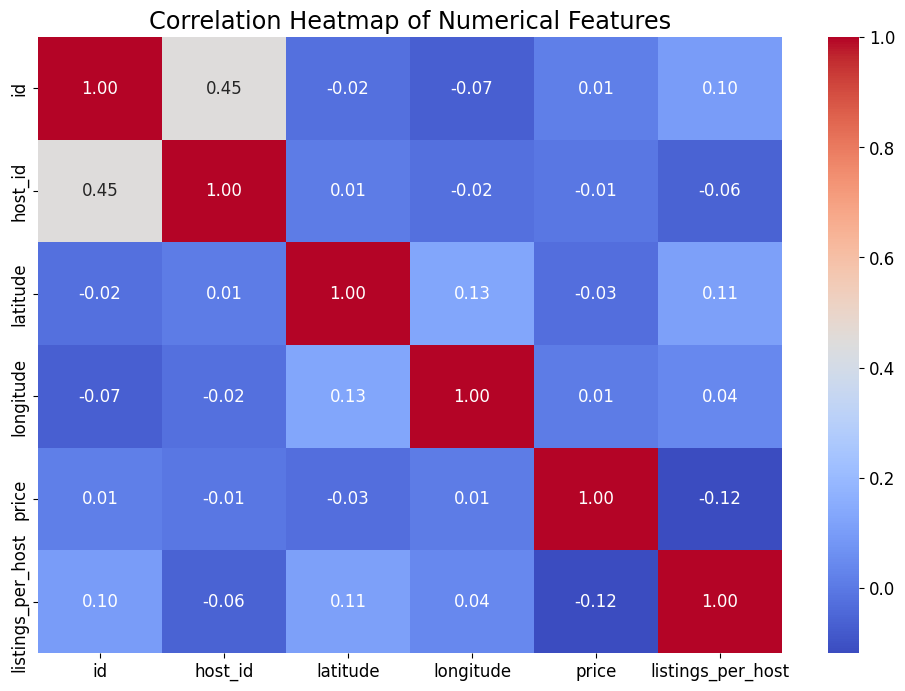

In [ ]:
# *6. Correlation Analysis Visualization
numerical_df = filtered_df.select_dtypes(include=[float, int])
correlation_matrix = numerical_df.corr()

# Correlation Heatmap
fig6, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", ax=ax)
ax.set_title("Correlation Heatmap of Numerical Features")

plt.show()

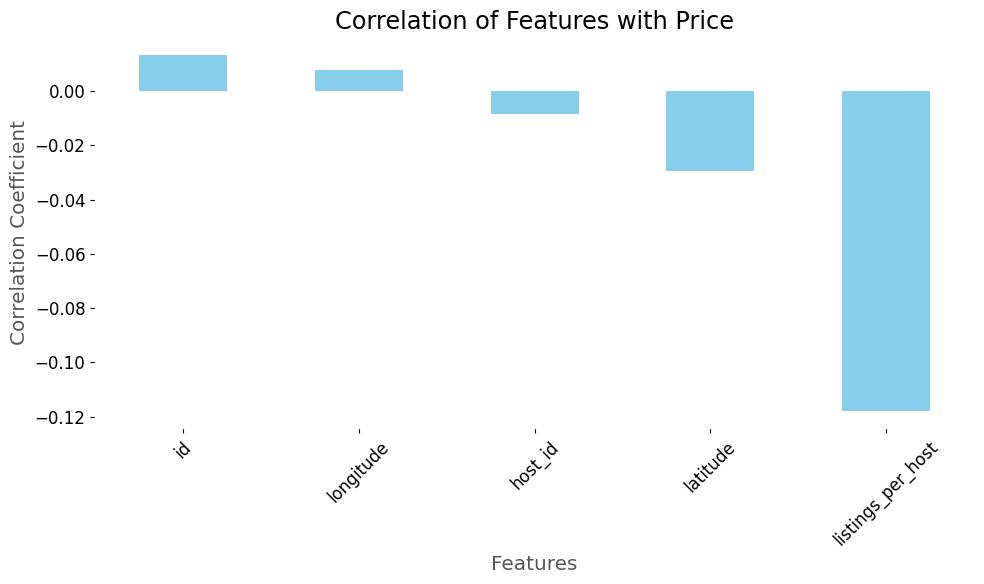

In [ ]:
# *7.Correlation with 'price'
price_correlations = correlation_matrix["price"].sort_values(ascending=False)
fig7, ax = plt.subplots(figsize=(10, 6))
price_correlations.drop("price").plot(kind="bar", color="skyblue", ax=ax)
ax.set_title("Correlation of Features with Price")
ax.set_xlabel("Features")
ax.set_ylabel("Correlation Coefficient")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [ ]:
script_dir = os.path.dirname(__file__)
export_dir = os.path.join(script_dir, "../reports/figures/")
figures = [
    (fig1, "competition_by_neighbourhood.png"),
    (fig2, "pricing_and_competition_correlation.png"),
    (fig3, "average_pricing_by_neighbourhood.png"),
    (fig4, "popular_property_types_by_neighbourhood.png"),
    (fig5, "listings_per_host_histogram.png"),
    (fig6, "correlation_heatmap.png"),
    (fig7, "correlation_with_price.png"),
]

for index, (fig, filename) in enumerate(figures, start=1):
    export_figs(export_dir, fig, index, filename)

print("Figures exported to ../reports/figures/")

Figures exported to ../reports/figures/
